<a href="https://colab.research.google.com/github/GopikaPoornimaC/Bank-Customer-Churn-Model/blob/main/Bank_Customer_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Title : Bank Customer Churn Model**

### **Objective :**
**Bank Customer Churn prediction means knowing which customers are likely to leave or unsubscribe from your service It is to identify and visualize which factors contribute to customer churn.**

## **Source code :**   **https://www.kaggle.com/datasets/gauravtopre/bank-customer-churn-dataset**






##  **Import Library**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **Import Data**

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Bank Customer Churn Prediction.csv')

In [6]:
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
df = df.set_index('customer_id')

# **Describe Data**

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 15634602 to 15628319
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      10000 non-null  int64  
 1   country           10000 non-null  object 
 2   gender            10000 non-null  object 
 3   age               10000 non-null  int64  
 4   tenure            10000 non-null  int64  
 5   balance           10000 non-null  float64
 6   products_number   10000 non-null  int64  
 7   credit_card       10000 non-null  int64  
 8   active_member     10000 non-null  int64  
 9   estimated_salary  10000 non-null  float64
 10  churn             10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 937.5+ KB


In [10]:
df.describe()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


## **Label Encoding**

In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [16]:
df['gender'] = le.fit_transform(df['gender'])
df['country'] = le.fit_transform(df['country'])

In [18]:
df['gender']

customer_id
15634602    0
15647311    0
15619304    0
15701354    0
15737888    0
           ..
15606229    1
15569892    1
15584532    0
15682355    1
15628319    0
Name: gender, Length: 10000, dtype: int64

In [19]:
df['country']

customer_id
15634602    0
15647311    2
15619304    0
15701354    0
15737888    2
           ..
15606229    0
15569892    0
15584532    0
15682355    1
15628319    0
Name: country, Length: 10000, dtype: int64

# **Data Visualization**

In [22]:
corr = df.corr()

<Axes: >

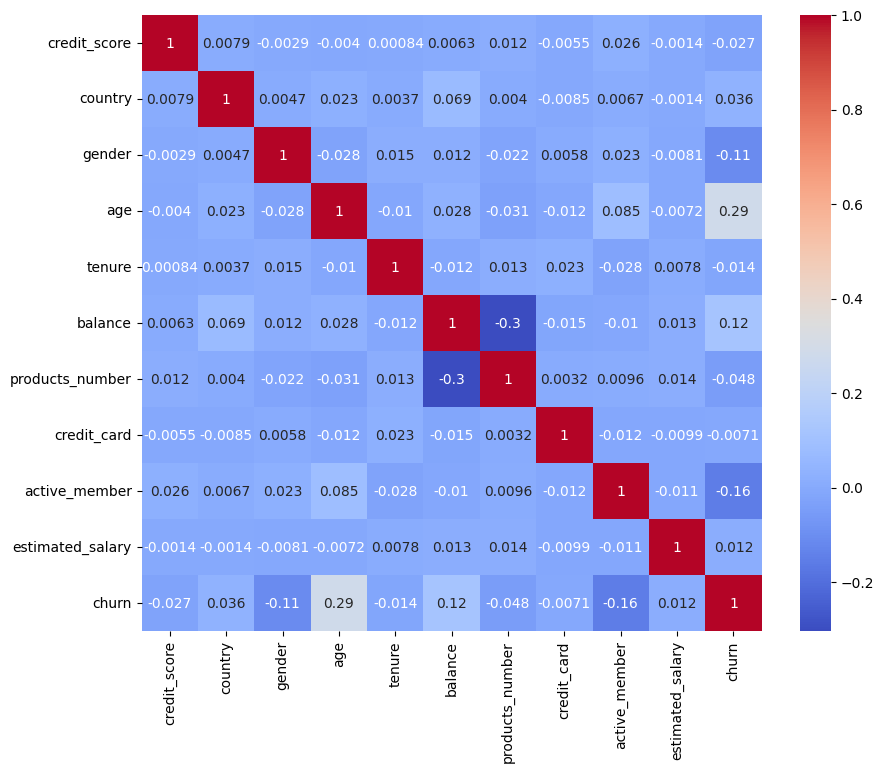

In [23]:
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True,cbar=True,cmap='coolwarm')

<Axes: xlabel='credit_card', ylabel='Count'>

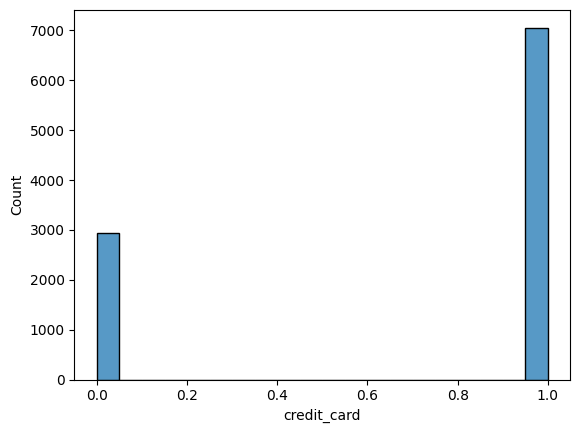

In [25]:
sns.histplot(df['credit_card'],bins=20)

<Axes: xlabel='gender', ylabel='count'>

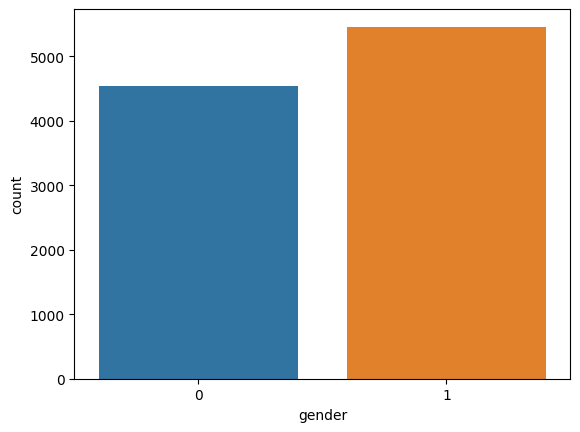

In [27]:
sns.countplot(x=df['gender'])

## **Data Preprocessing**

In [17]:
df.isnull().sum()

credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [12]:
df.duplicated().sum()

0

## **Define Target Variable (y) and Feature Variables (X)**

In [20]:
df.columns

Index(['credit_score', 'country', 'gender', 'age', 'tenure', 'balance',
       'products_number', 'credit_card', 'active_member', 'estimated_salary',
       'churn'],
      dtype='object')

In [28]:
X = df.drop(['churn'], axis = 1)

In [29]:
y = df['churn']

In [30]:
X.shape, y.shape

((10000, 10), (10000,))

In [31]:
df['churn'].value_counts()

0    7963
1    2037
Name: churn, dtype: int64

# **Train Test Split**

In [33]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=7)

# **Modeling**

In [32]:
from sklearn.preprocessing import StandardScaler
sclr = StandardScaler()

In [34]:
X_train = sclr.fit_transform(X_train)
X_test = sclr.fit_transform(X_test)

# **Model Evaluation**

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble  import RandomForestClassifier

In [41]:
models = {
    'lg':LogisticRegression(),
    'dtc':DecisionTreeClassifier(),
    'rfc':RandomForestClassifier()
}

In [42]:
for name,model in models.items():
    model.fit(X_train,y_train)
    ypred = model.predict(X_test)
    print(f"{name} with accuracy : {accuracy_score(y_test,ypred)} ")

lg with accuracy : 0.8115 
dtc with accuracy : 0.599 
rfc with accuracy : 0.863 


In [45]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
ypred = model.predict(X_test)


# **Prediction**

In [48]:
def prediction(credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary):
    features = np.array([[credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary]])
    features = sclr.fit_transform(features)
    prediction = rfc.predict(features).reshape(1,-1)
    return prediction[0]

credit_score = 608
country = 2
gender = 0
age= 41
tenure= 1
balance = 83807.86
products_number= 1
credit_card = 0
active_member =1
estimated_salary = 112542.58
pred  = prediction(credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary)

In [51]:
if pred == 1:
    print("he left the compnay")
else:
    print("he is there still")

he is there still
